In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import RZGate, RZZGate
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.5
beta  = 0.1
n_qubits = 3  

trotter_steps = 10
T = 0.25  

qr = QuantumRegister(n_qubits)
cr = ClassicalRegister(n_qubits, name='cr')
qc = QuantumCircuit(qr, cr)

for i in range(n_qubits):
    qc.h(i)

for step in range(trotter_steps):
    qc.rzz(-2 * gamma * 3 * (T / trotter_steps), 0, 1)
    qc.rzz(-2 * gamma * 2 * (T / trotter_steps), 0, 2)
    qc.rzz(-2 * gamma * 6 * (T / trotter_steps), 1, 2)

    for i in range(n_qubits):
        qc.rx(2 * beta, i)

qc.measure(range(n_qubits), range(n_qubits))


{'000': 131, '101': 184, '110': 76, '011': 143, '010': 187, '001': 67, '100': 132, '111': 104}


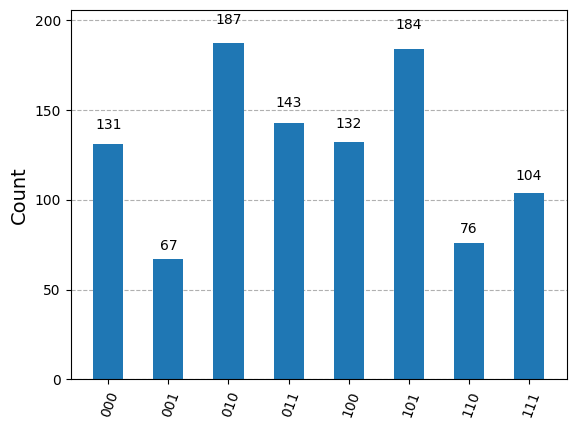

In [2]:
simulator = BasicSimulator()

compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

print(result.get_counts())

plot_histogram(result.get_counts())

{'100': 156, '111': 119, '001': 96, '101': 168, '011': 139, '110': 79, '000': 100, '010': 167}


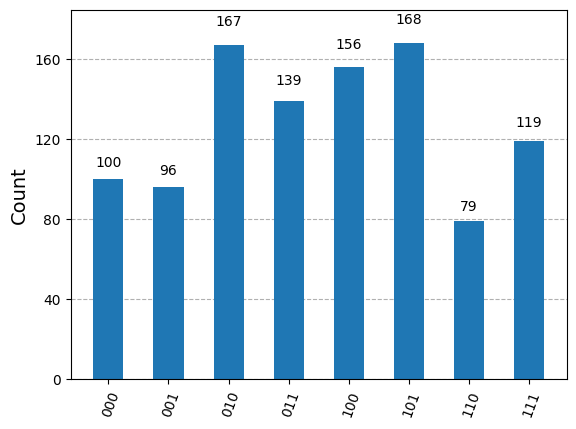

In [8]:
# Use the following code instead if you want to run on a simulator:
from qiskit_ibm_runtime.fake_provider import FakeKyiv
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService

backend = FakeKyiv()

# Define Sampler
sampler = Sampler(mode=backend)

compiled_circuit = transpile(qc, backend)

# Run calculation
job = sampler.run([compiled_circuit], shots=1024)
 
result = job.result()

counts = result[0].data.cr.get_counts()

print(counts)

# Plot the histogram
plot_histogram(counts)

{'100': 192, '000': 92, '110': 122, '111': 91, '010': 80, '101': 268, '011': 103, '001': 76}


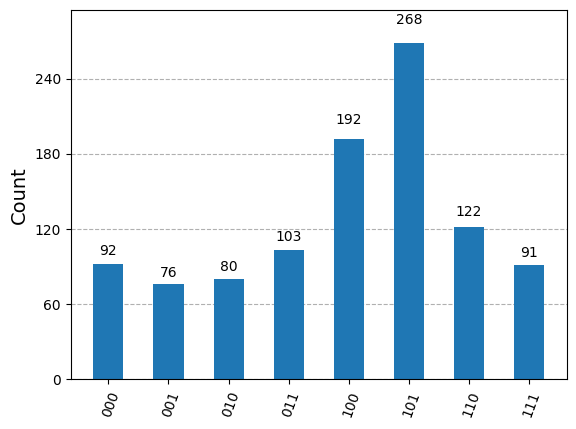

In [6]:
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
 
api_token = '...'
service = QiskitRuntimeService(channel="ibm_quantum", token=api_token)
 
backend = service.least_busy(operational=True, simulator=False)
 
sampler = Sampler(mode=backend)

compiled_circuit = transpile(qc, backend)

job = sampler.run([compiled_circuit], shots=1024)
 
result = job.result()

counts = result[0].data.cr.get_counts()

print(counts)

plot_histogram(counts)